# Import some Prerequisite

In [0]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.callbacks import EarlyStopping
import numpy as np
import random
import matplotlib.pyplot as plt

# Load Dataset and prepare it

Load shekespear dataset

In [0]:
sh_file = open('shakespear.txt')
sh_text = sh_file.read()

create vocabulary

In [0]:
vocabulary = sorted(set(sh_text))

char_to_idx = { char : idx for idx, char in enumerate(vocabulary)}
idx_to_char = { idx : char for idx, char in enumerate(vocabulary)}

generate input and target data out of text

In [0]:
maxlen = 40
input_data = []
target_data = []

for i in range(0,len(sh_text)-maxlen):
  input_data.append(sh_text[i:i+maxlen])
  target_data.append(sh_text[i+maxlen])

Prepare the Input and target data

In [0]:
X = np.zeros((len(target_data),maxlen,len(vocabulary)),dtype ='float64')

for s_idx, sentence in enumerate(input_data):
  for c_idx, char in enumerate(sentence):
    X[s_idx,c_idx,char_to_idx[char]] = 1

y = np.zeros((len(target_data),len(vocabulary)),dtype ='float64')
for s_idx, sentence in enumerate(target_data):
  y[s_idx,char_to_idx[target_data[s_idx]]] = 1


# Build a model

In [104]:
model = Sequential()
model.add(LSTM(128,input_shape=(maxlen,len(vocabulary))))
model.add(Dense(len(vocabulary),activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['acc'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 128)               97792     
_________________________________________________________________
dense_6 (Dense)              (None, 62)                7998      
Total params: 105,790
Trainable params: 105,790
Non-trainable params: 0
_________________________________________________________________


# Train the model

In [105]:
history = model.fit(X,y,epochs = 20 ,batch_size=128,validation_split=0.2,callbacks=[EarlyStopping(patience=2)])


Train on 79962 samples, validate on 19991 samples
Epoch 1/20
79962/79962 [==============================] - 109s 1ms/step - loss: 2.9076 - acc: 0.2276 - val_loss: 2.5120 - val_acc: 0.3034
Epoch 2/20
79962/79962 [==============================] - 101s 1ms/step - loss: 2.3850 - acc: 0.3254 - val_loss: 2.3033 - val_acc: 0.3443
Epoch 3/20
79962/79962 [==============================] - 104s 1ms/step - loss: 2.2471 - acc: 0.3584 - val_loss: 2.2174 - val_acc: 0.3722
Epoch 4/20
79962/79962 [==============================] - 110s 1ms/step - loss: 2.1696 - acc: 0.3792 - val_loss: 2.1546 - val_acc: 0.3862
Epoch 5/20
79962/79962 [==============================] - 111s 1ms/step - loss: 2.1007 - acc: 0.3946 - val_loss: 2.0910 - val_acc: 0.4018
Epoch 6/20
79962/79962 [==============================] - 117s 1ms/step - loss: 2.0379 - acc: 0.4097 - val_loss: 2.0463 - val_acc: 0.4101
Epoch 7/20
79962/79962 [==============================] - 103s 1ms/step - loss: 1.9969 - acc: 0.4194 - val_loss: 2.0081 - 

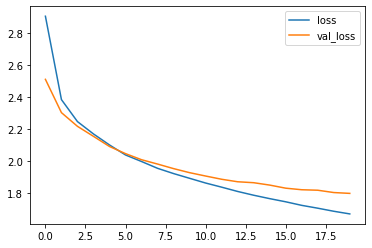

In [106]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

# generate a shakespeare play

In [0]:
def sampling(preds,temperature):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [108]:
generated_text =''
text_len =400
start_idx = random.randint(0, len(sh_text) - maxlen - 1)
generated_text = sh_text[start_idx:start_idx+maxlen]
print('text seed:\n '+ generated_text+'\n')

sample =  np.zeros((1,maxlen,len(vocabulary)),dtype ='float64')
for c_idx,char in enumerate(generated_text):
  sample[0,c_idx,char_to_idx[char]] = 1

for i in range(text_len):
  sample =  np.zeros((1,maxlen,len(vocabulary)),dtype ='float64')
  for c_idx,char in enumerate(generated_text[i:]):
    sample[0,c_idx,char_to_idx[char]] = 1
  preds = model.predict(sample)[0]
  next_char_idx = sampling(preds,0.5)
  next_char = idx_to_char[next_char_idx]
  generated_text+=next_char
  
print('genrated text:\n'+generated_text)

text seed:
 rue, sirrah; let us blame it too: I can 

genrated text:
rue, sirrah; let us blame it too: I can my partured with the all with the words,
And the forle there of the his are of that it thou that one sofe his ade
And the reast the greath of your friends,
And the share in the himss of the stayed
If he doth to the frember my both that and and simpite, therefore,
That and the with to do the confeld, and hese to her comes,
We how the wist by the larth and his from the love him for her and
To still 
